In [1]:
import collections
import numpy as np
from tqdm import tqdm
import os
import random
import torch
from SPAIC import spaic
import torch.nn.functional as F
from SPAIC.spaic.Learning.Learner import Learner
from SPAIC.spaic.Library.Network_saver import network_save
from SPAIC.spaic.Library.Network_loader import network_load
from SPAIC.spaic.IO.Dataset import MNIST as dataset
from SPAIC.spaic.IO.Dataset import CUSTOM_MNIST
import gymnasium as gym
import matplotlib.pyplot as plt
from torch.utils.tensorboard import SummaryWriter



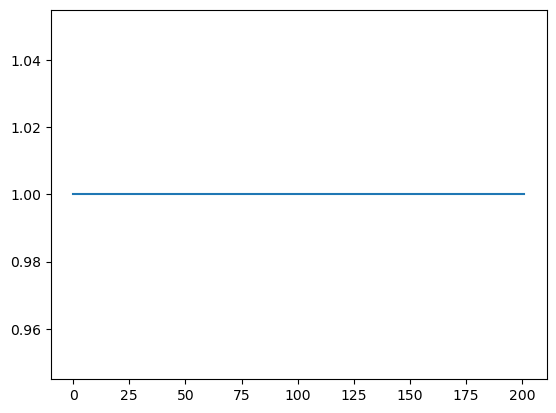

In [18]:
eval_acc = np.loadtxt('eval_acc.txt',delimiter=',',dtype=float)
plt.plot(eval_acc)

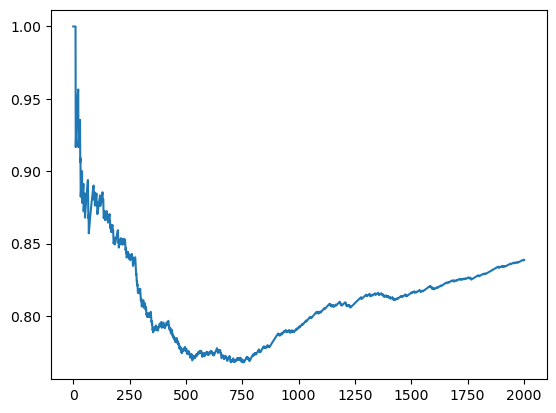

In [17]:
nd_eval_acc = np.loadtxt('nd_eval_acc.txt',delimiter=',',dtype=float)
plt.plot(nd_eval_acc)

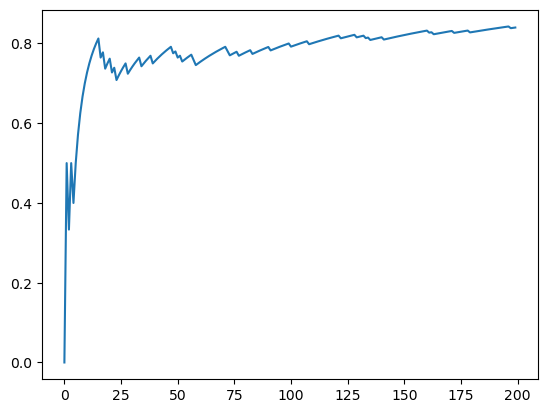

In [4]:
mic_eval_acc = np.loadtxt('cobot_eval_acc.txt',delimiter=',',dtype=float)
plt.plot(mic_eval_acc)

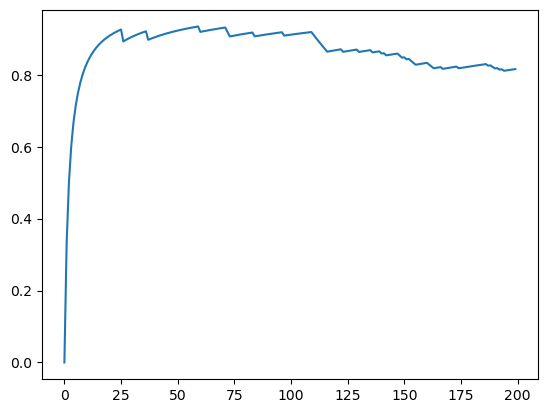

In [5]:
mic_eval_acc = np.loadtxt('cobot_test_acc_after_micc.txt',delimiter=',',dtype=float)
plt.plot(mic_eval_acc)

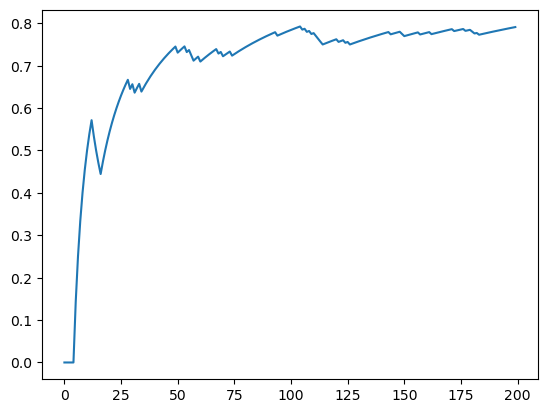

In [6]:
mic_eval_acc = np.loadtxt('cobot_test_acc_before_micc.txt',delimiter=',',dtype=float)
plt.plot(mic_eval_acc)